# importing the required libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Loading the Dataset

In [23]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

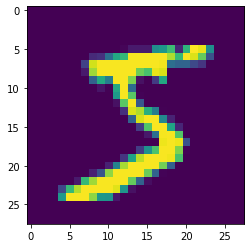

In [7]:
plt.imshow(X_train[0])

# Normalization

In [8]:
X_train=X_train/255
X_test=X_test/255

In [9]:
X_train_flatten=X_train.reshape(len(X_train),28*28)

In [11]:
X_train_flatten.shape

(60000, 784)

# Flattening the images

In [12]:
X_test_flatten=X_test.reshape(len(X_test),28*28)

In [14]:
X_test_flatten.shape

(10000, 784)

# Model with input layer and output only

In [15]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

In [19]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
model.fit(X_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3040 - accuracy: 0.9146
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2838 - accuracy: 0.9210
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9229
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9262
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2620 - accuracy: 0.9269


In [24]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2689 - accuracy: 0.9267


[0.2689381539821625, 0.9266999959945679]

In [25]:
y_predict=model.predict(X_test_flatten)

313/313 [==============================] - 1s 1ms/step


In [27]:
y_predict[0]

array([2.8630184e-02, 1.2801424e-07, 4.6080939e-02, 9.5855719e-01,
       1.5377963e-03, 1.0694681e-01, 8.2383673e-07, 9.9984384e-01,
       1.1412431e-01, 7.2040731e-01], dtype=float32)

In [49]:
np.argmax(y_predict[0])

7

In [50]:
y_test[0]

7

In [51]:
predicted_label=[np.argmax(i) for i in y_predict]

In [54]:
confussion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=predicted_label)

# Confussion Matrix

In [56]:
confussion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    2,    0,    4,    3,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   9,    9,  915,   17,    6,    3,   13,   10,   46,    4],
       [   5,    0,   17,  918,    1,   23,    2,   10,   28,    6],
       [   2,    1,    3,    2,  913,    0,   10,    4,   10,   37],
       [  13,    2,    1,   30,    9,  779,   14,    7,   31,    6],
       [  12,    3,    8,    1,    7,   11,  912,    2,    2,    0],
       [   1,    6,   22,    6,    5,    0,    0,  953,    5,   30],
       [  12,    8,    5,   17,    9,   19,    9,   12,  876,    7],
       [  11,    7,    1,   10,   22,    5,    0,   21,    8,  924]],
      dtype=int32)>

In [57]:
import seaborn as sn

Text(69.0, 0.5, 'Truth')

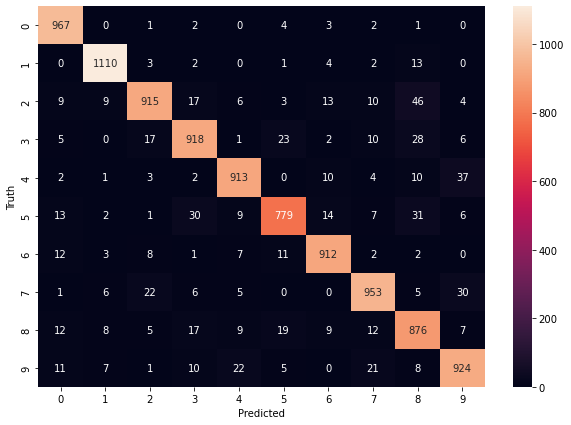

In [60]:
plt.figure(figsize=(10,7))
sn.heatmap(confussion_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# model with one Hidden Layer

In [63]:
model=keras.Sequential([ 
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2717 - accuracy: 0.9235
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1215 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0844 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0649 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0515 - accuracy: 0.9840


In [64]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0877 - accuracy: 0.9724


[0.08774645626544952, 0.9724000096321106]

Text(69.0, 0.5, 'Truth')

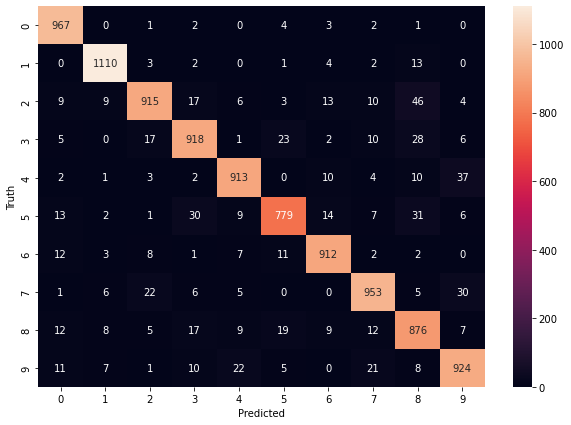

In [65]:
plt.figure(figsize=(10,7))
sn.heatmap(confussion_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')